In [25]:
import json

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
pattern_name = 'P19'

In [66]:
input_file = f'../data/output/unpatterns/{pattern_name}_bert-large-cased.json'

In [67]:
with open(input_file, 'r') as f:
    data = json.load(f)

In [68]:
unpatterns_file = f'../data/unpattern_data/{pattern_name}.jsonl'

In [69]:
with open(unpatterns_file, 'r') as f:
    all_patterns = f.readlines()
    all_patterns = [json.loads(x) for x in all_patterns]

In [84]:
base_pattern = [x['pattern'] for x in all_patterns if x['base'] == True][0]
other_patterns = [x['pattern'] for x in all_patterns if x['base'] == False]

In [74]:
all_patterns

[{'pattern': '[X] was born in [Y].', 'base': True},
 {'pattern': '[X] died in [Y].', 'base': False},
 {'pattern': '[X] got a divorce in [Y].', 'base': False},
 {'pattern': '[X] married in [Y].', 'base': False},
 {'pattern': '[X] lived in [Y].', 'base': False},
 {'pattern': '[X] worked in [Y].', 'base': False},
 {'pattern': '[X] started a family in [Y].', 'base': False},
 {'pattern': '[X] bought a house in [Y].', 'base': False}]

In [48]:
data.keys()

dict_keys(['[X] was born in [Y].', '[X] was married in [Y].'])

In [49]:
data['[X] was born in [Y].'].keys()

dict_keys(['data', 'predictions'])

In [50]:
data['[X] was born in [Y].']['predictions'][0]

[{'sequence': '[CLS] Allan Peiper was born in Vienna. [SEP]',
  'score': 0.1382654905319214,
  'token': 5337,
  'token_str': 'Vienna'},
 {'sequence': '[CLS] Allan Peiper was born in Berlin. [SEP]',
  'score': 0.08819528669118881,
  'token': 3206,
  'token_str': 'Berlin'},
 {'sequence': '[CLS] Allan Peiper was born in Munich. [SEP]',
  'score': 0.047068849205970764,
  'token': 6947,
  'token_str': 'Munich'},
 {'sequence': '[CLS] Allan Peiper was born in Germany. [SEP]',
  'score': 0.04091975837945938,
  'token': 1860,
  'token_str': 'Germany'},
 {'sequence': '[CLS] Allan Peiper was born in London. [SEP]',
  'score': 0.03444024920463562,
  'token': 1498,
  'token_str': 'London'}]

In [51]:
base_pattern = '[X] was born in [Y].'
other_pattern = '[X] was married in [Y].'

In [89]:
def get_base_other_probs(data, base_patter, other_pattern):
    base_probs = []
    other_probs = []

    for ind, data_row in enumerate(data[base_pattern]['data']):
        obj = data_row['obj_label']

        if data[base_pattern]['predictions'][ind][0]['token_str'] == obj:
            true_pattern_prob = data[base_pattern]['predictions'][ind][0]['score']
            base_probs.append(true_pattern_prob)

        if data[other_pattern]['predictions'][ind][0]['token_str'] == obj:
            other_pattern_prob = data[other_pattern]['predictions'][ind][0]['score']
            other_probs.append(other_pattern_prob)

    return base_probs, other_probs

In [105]:
base_probs, other_probs = get_base_other_probs(data, base_pattern, other_patterns[6])

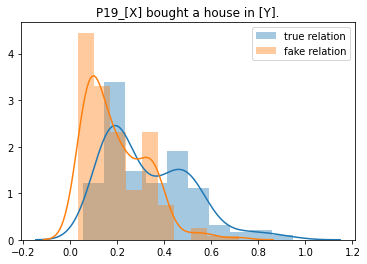

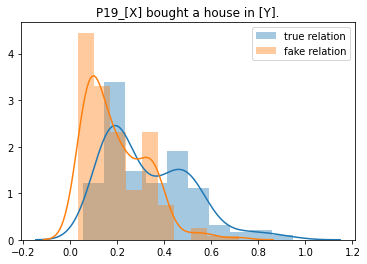

In [109]:
sns.distplot(np.array(base_probs), label='true relation')
sns.distplot(np.array(other_probs), label='fake relation')

plt.legend();
plt.title(f'{pattern_name}_{other_patterns[6]}');

plt.show()

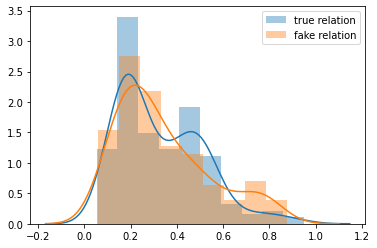

In [81]:
sns.distplot(np.array(base_probs), label='true relation')
sns.distplot(np.array(other_probs), label='fake relation')

plt.legend();

In [38]:
len(base_probs)

210

In [39]:
len(other_probs)

147

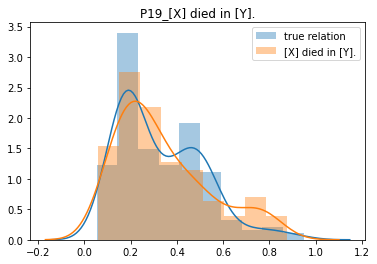

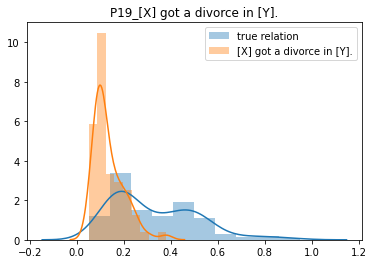

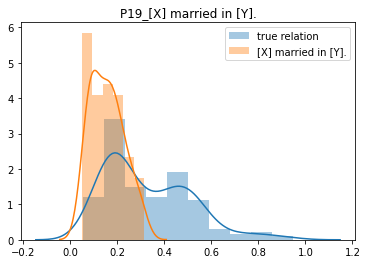

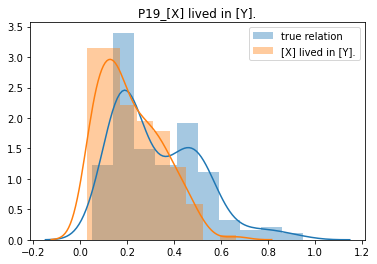

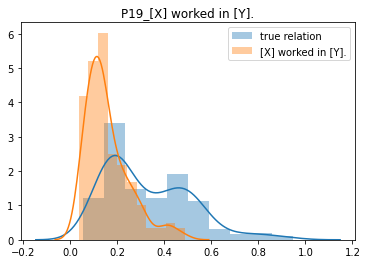

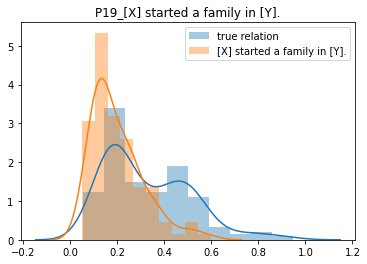

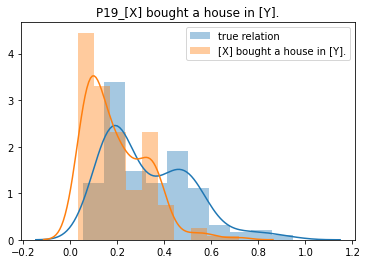

In [112]:
for other_pattern in other_patterns:
    base_probs, other_probs = get_base_other_probs(data, base_pattern, other_pattern)
    sns.distplot(np.array(base_probs), label='true relation')
    sns.distplot(np.array(other_probs), label=other_pattern)

    plt.legend();
    plt.title(f'{pattern_name}_{other_pattern}');

    plt.show()